<a href="https://colab.research.google.com/github/ritamiitism/LearningML/blob/main/zerodetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.get_logger().setLevel('ERROR')


In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert to binary classification: 1 if digit is 0, else 0
y_train_binary = (y_train == 0).astype("int")
y_test_binary = (y_test == 0).astype("int")

# Normalize images (0–255 → 0–1)
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

print(X_train.shape, y_train_binary.shape)
#print(y_train_binary[0]);


(60000, 784) (60000,)


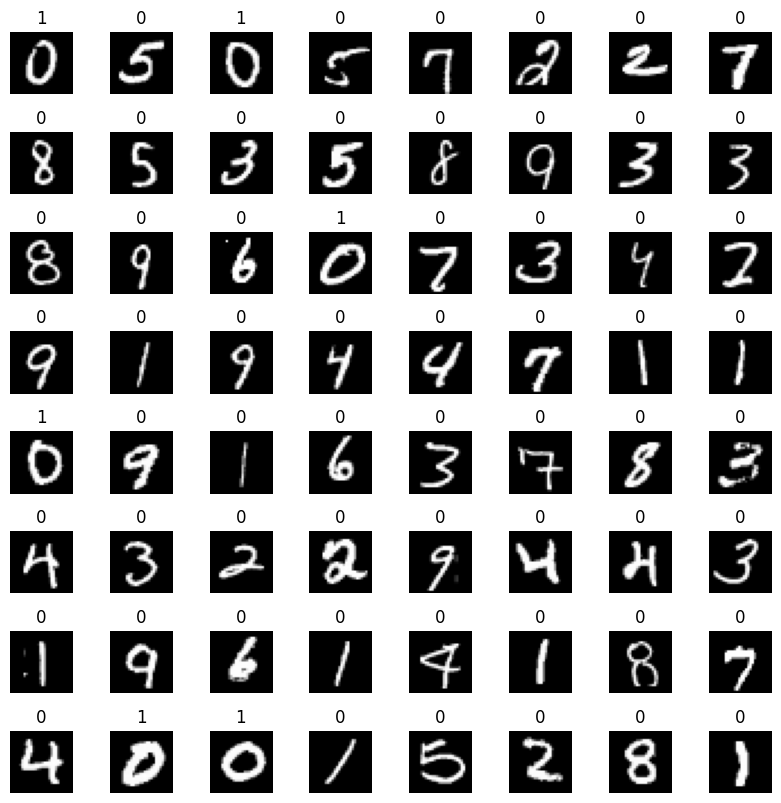

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten MNIST images
# labels
y = (y_train == 0).astype(int)
X = X_train.reshape(X_train.shape[0], -1)

m, n = X.shape    # (60000, 784)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, m)
    # reshape image back to 28x28
    img = X[random_index].reshape(28, 28)

    ax.imshow(img, cmap='gray')

    ax.set_title(str(y[random_index]))
    ax.set_axis_off()


In [56]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(128,activation="relu"),
        Dense(64,activation="relu"),
        Dense(32,activation="relu"),
        Dense(1,activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,849 (433.00 KB)

 Trainable params: 110,849 (433.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.001),)
model.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0246
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0247
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0116
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0106
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0081
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0042
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0053


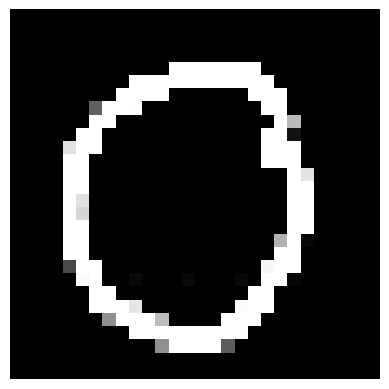

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Raw prediction: [[0.24526384]]
It is zero


In [73]:
# -----------------------------
# IMPORTS
# -----------------------------
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage

# -----------------------------
# LOAD IMAGE
# -----------------------------
path = "/content/drive/MyDrive/digits/zero2.png"   # change if needed

# Load grayscale + resize to MNIST 28x28
img = Image.open(path).convert("L").resize((28, 28), Image.NEAREST)

# Show the processed input image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# -----------------------------
# PREPROCESSING
# -----------------------------

# Convert to uint8 array (0–255)
arr = np.array(img).astype(np.uint8)

# 1. THICKEN DIGIT
kernel = np.ones((2,2), np.uint8)
arr = cv2.dilate(arr, kernel, iterations=1)

# 2. CENTER DIGIT
cy, cx = scipy.ndimage.center_of_mass(arr > 10)
shift_x = int(14 - cx)
shift_y = int(14 - cy)
arr = scipy.ndimage.shift(arr, shift=[shift_y, shift_x],
                          mode='constant', cval=0)

# 3. NORMALIZE (convert to 0–1 float)
arr = arr.astype(np.float32) / 255.0

# 4. LIGHT BLUR
arr = cv2.GaussianBlur(arr, (3,3), 0)

# -----------------------------
# PREDICT
# -----------------------------
prediction = model.predict(arr.reshape(1, 784))
print("Raw prediction:", prediction)

if prediction > 0.05:
    print("It is zero")
else:
    print("It is non-zero")


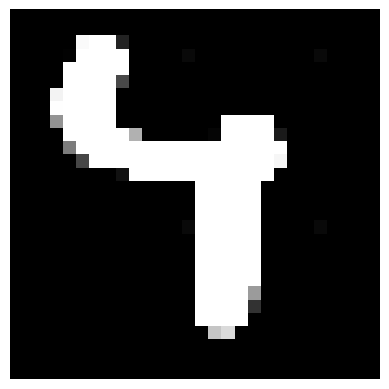

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Raw prediction: [[0.01543461]]
It is non-zero


In [75]:
# -----------------------------
# IMPORTS
# -----------------------------
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage

# -----------------------------
# LOAD IMAGE
# -----------------------------
path = "/content/drive/MyDrive/digits/nonz.png"   # change if needed

# Load grayscale + resize to MNIST 28x28
img = Image.open(path).convert("L").resize((28, 28), Image.NEAREST)

# Show the processed input image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# -----------------------------
# PREPROCESSING
# -----------------------------

# Convert to uint8 array (0–255)
arr = np.array(img).astype(np.uint8)

# 1. THICKEN DIGIT
kernel = np.ones((2,2), np.uint8)
arr = cv2.dilate(arr, kernel, iterations=1)

# 2. CENTER DIGIT
cy, cx = scipy.ndimage.center_of_mass(arr > 10)
shift_x = int(14 - cx)
shift_y = int(14 - cy)
arr = scipy.ndimage.shift(arr, shift=[shift_y, shift_x],
                          mode='constant', cval=0)

# 3. NORMALIZE (convert to 0–1 float)
arr = arr.astype(np.float32) / 255.0

# 4. LIGHT BLUR
arr = cv2.GaussianBlur(arr, (3,3), 0)

# -----------------------------
# PREDICT
# -----------------------------
prediction = model.predict(arr.reshape(1, 784))
print("Raw prediction:", prediction)

if prediction > 0.05:
    print("It is zero")
else:
    print("It is non-zero")


In [74]:
# Test outputs
p_zero = model.predict(X_test[y_test == 0].reshape(-1,784)).mean()
p_nonzero = model.predict(X_test[y_test != 0].reshape(-1,784)).mean()

print("Average output for ZERO:", p_zero)
print("Average output for NON-ZERO:", p_nonzero)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Average output for ZERO: 0.9682282
Average output for NON-ZERO: 0.00074140815
